In [148]:

from tensorflow.keras.models import load_model

model = load_model('facenet_keras.h5')# load the model

print(model.inputs)
print(model.outputs)

[<tf.Tensor 'input_1_4:0' shape=(None, 160, 160, 3) dtype=float32>]
[<tf.Tensor 'Bottleneck_BatchNorm_3/Identity:0' shape=(None, 128) dtype=float32>]


In [ ]:
#Dataset
# https://drive.google.com/file/d/1IuRDCbCDKES1d3VnXZGmX3NqRCcHqw7H/view?usp=sharing

#https://drive.google.com/drive/folders/1PffV5nGK3-yga3OkgIzKX38ZmOvo3Q_X?usp=sharing

In [83]:
#!pip install mtcnn

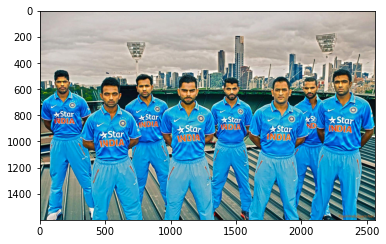

In [168]:
from PIL import Image
from matplotlib import pyplot as plt
# load image from file
image = plt.imread('group_img.jpg')
plt.imshow(image)

In [156]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(image)

In [157]:
len(results)

8

In [159]:
results #hounding boxes for each face and position of eyes, nose and mouth

[{'box': [747, 531, 107, 132],
  'confidence': 0.9999997615814209,
  'keypoints': {'left_eye': (773, 582),
   'right_eye': (821, 578),
   'nose': (799, 606),
   'mouth_left': (783, 633),
   'mouth_right': (821, 630)}},
 {'box': [1791, 555, 110, 146],
  'confidence': 0.9999997615814209,
  'keypoints': {'left_eye': (1816, 608),
   'right_eye': (1868, 609),
   'nose': (1839, 642),
   'mouth_left': (1819, 666),
   'mouth_right': (1862, 667)}},
 {'box': [1068, 555, 121, 155],
  'confidence': 0.9999788999557495,
  'keypoints': {'left_eye': (1105, 615),
   'right_eye': (1162, 616),
   'nose': (1136, 648),
   'mouth_left': (1110, 675),
   'mouth_right': (1157, 677)}},
 {'box': [476, 577, 125, 169],
  'confidence': 0.9999773502349854,
  'keypoints': {'left_eye': (513, 643),
   'right_eye': (572, 642),
   'nose': (545, 675),
   'mouth_left': (519, 707),
   'mouth_right': (567, 705)}},
 {'box': [2249, 494, 117, 155],
  'confidence': 0.9999309778213501,
  'keypoints': {'left_eye': (2273, 550),
   

In [178]:
#extract only face regions
faces=[]
for i in range(len(results)):
    # extract the bounding box from the first face
    x1, y1, width, height = results[i]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    # extract the face
    face = image[y1:y2, x1:x2]

    # resize pixels to the model size
    image1 = Image.fromarray(face)
    image1 = image1.resize((160, 160))
    face_array = np.array(image1)
    faces.append(face_array)

In [180]:
len(faces)

8

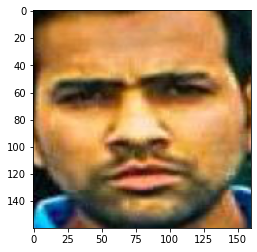

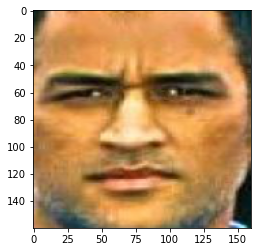

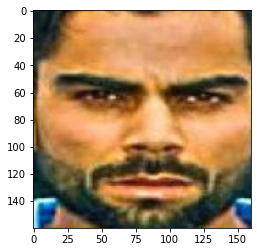

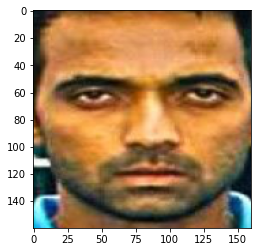

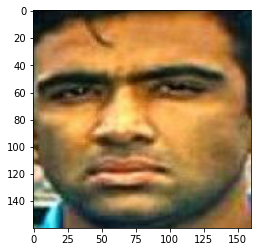

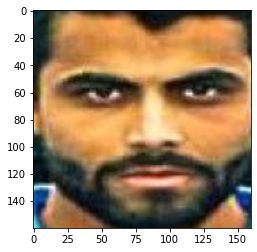

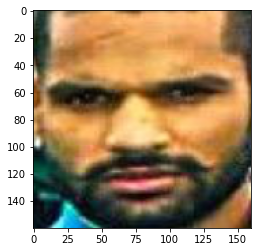

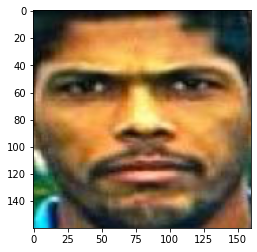

In [181]:
for i in faces:
    plt.imshow(i)
    plt.show()

In [186]:
results

[{'box': [62, 44, 76, 100],
  'confidence': 0.9997827410697937,
  'keypoints': {'left_eye': (84, 85),
   'right_eye': (119, 85),
   'nose': (103, 103),
   'mouth_left': (86, 120),
   'mouth_right': (119, 121)}}]

In [ ]:
detector = MTCNN()

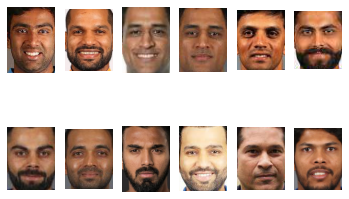

In [203]:

from os import listdir
folder = 'Database_photo/'
i = 1
face_ref=[]
# enumerate files
for filename in listdir(folder):

    path = folder + filename
    image = plt.imread(path)
    #print(image.shape)
#     plt.imshow(image)
#     plt.show()
    results = detector.detect_faces(image)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = image[y1:y2, x1:x2]
    # resize pixels to the model size
    image1 = Image.fromarray(face)
    image1 = image1.resize((160,160))
    face_array = np.array(image1)
    face_ref.append(face_array)
    #print(i, face_array.shape)
    # plot
    plt.subplot(2, 6, i)
    plt.axis('off')
    plt.imshow(face)
    i += 1
plt.show()

In [205]:
emb_ref=[]
for i in range(len(face_ref)):
    face_pn=face_ref[i].astype('float32')
    # standardize pixel values across channels (global)
    mean, std = face_pn.mean(), face_pn.std()
    face_pn = (face_pn - mean) / std

    face_pn = np.expand_dims(face_pn, axis=0)

    y_pn = model.predict(face_pn)
    # get embedding
    embedding_ref = y_pn[0]
    emb_ref.append(embedding_ref)

In [206]:
len(emb_ref)

12

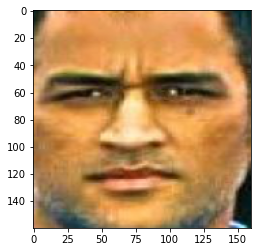

In [211]:
i=1 #give the index of any player
plt.imshow(faces[i]) # Anchor/original face in the group image
face_anch=faces[i].astype('float32')
# standardize pixel values across channels (global)
mean, std = face_anch.mean(), face_anch.std()
face_anch = (face_anch - mean) / std

face_anch = np.expand_dims(face_anch, axis=0)

y_anch = model.predict(face_anch)
# get embedding
emb_anch = y_anch[0]

In [212]:
#Compare the embedding of anchor image with reference image
res1=[]
for i in range(len(emb_ref)):
    res1.append(np.sqrt(np.sum((emb_ref[i]-emb_anch)**2)))

In [213]:
res1

[14.064121,
 12.330101,
 7.821689,
 8.832167,
 14.45756,
 15.020673,
 15.034157,
 14.015765,
 15.263351,
 14.846828,
 13.353083,
 16.37008]

In [214]:
np.argmin(res1)

2

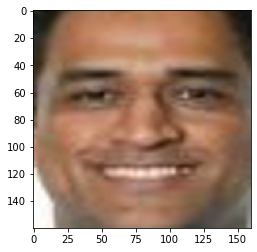

In [215]:
plt.imshow(face_ref[np.argmin(res1)])